## Importing data

In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-books-reviews/books_data.csv
/kaggle/input/amazon-books-reviews/Books_rating.csv


In [3]:
df = pd.read_csv('/kaggle/input/amazon-books-reviews/Books_rating.csv')

In [4]:
df.head(2)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


## Data Cleaning

In [6]:
ratings = df.loc[:, ['Title','User_id', 'review/score']]

In [7]:
ratings.isnull().sum()

Title              208
User_id         561787
review/score         0
dtype: int64

In [8]:
ratings.dropna(inplace=True)

In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438018 entries, 0 to 2999998
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Title         object 
 1   User_id       object 
 2   review/score  float64
dtypes: float64(1), object(2)
memory usage: 74.4+ MB


In [10]:
ratings.shape

(2438018, 3)

## EDA

In [11]:
import matplotlib.pyplot as plt

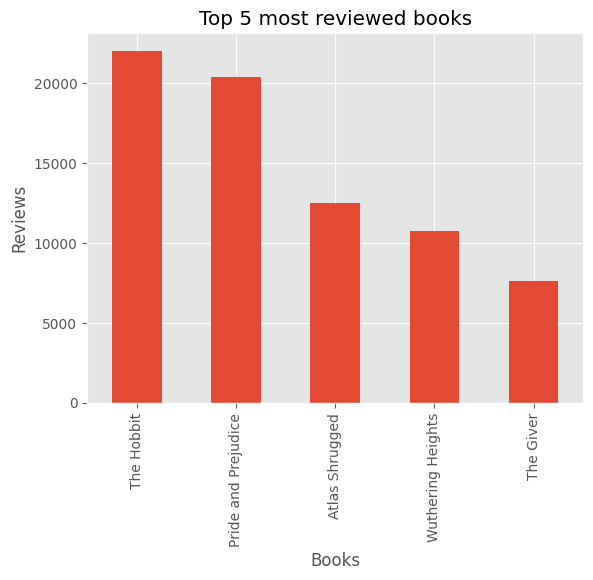

In [12]:
plt.style.use('ggplot')
df['Title'].value_counts().head().plot(kind='bar')
plt.title("Top 5 most reviewed books")
plt.ylabel("Reviews")
plt.xlabel('Books')
plt.show()

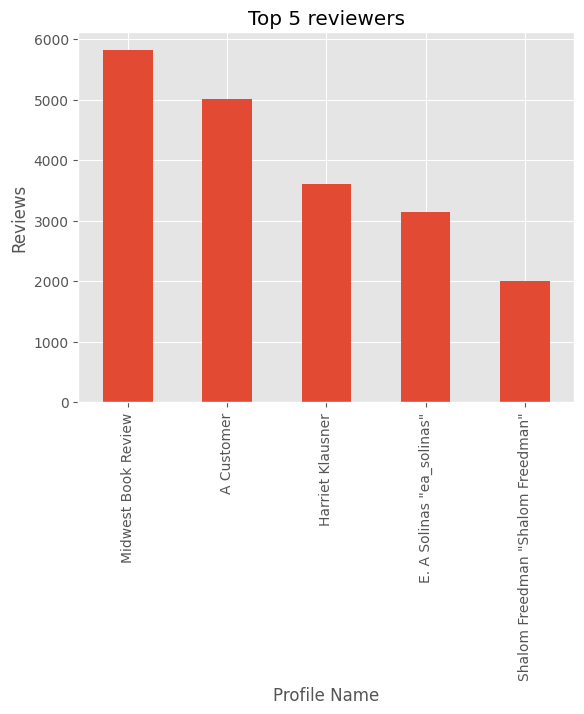

In [13]:
df['profileName'].value_counts().head().plot(kind='bar')
plt.title("Top 5 reviewers")
plt.ylabel("Reviews")
plt.xlabel('Profile Name')
plt.show()

In [14]:
# Book with Highest price
df.loc[df['Price'].argmax(), ['Title', 'Price']]

Title    Visual Genetics Plus: Tutorial and Lab Simulat...
Price                                                995.0
Name: 1501750, dtype: object

In [15]:
from wordcloud import WordCloud

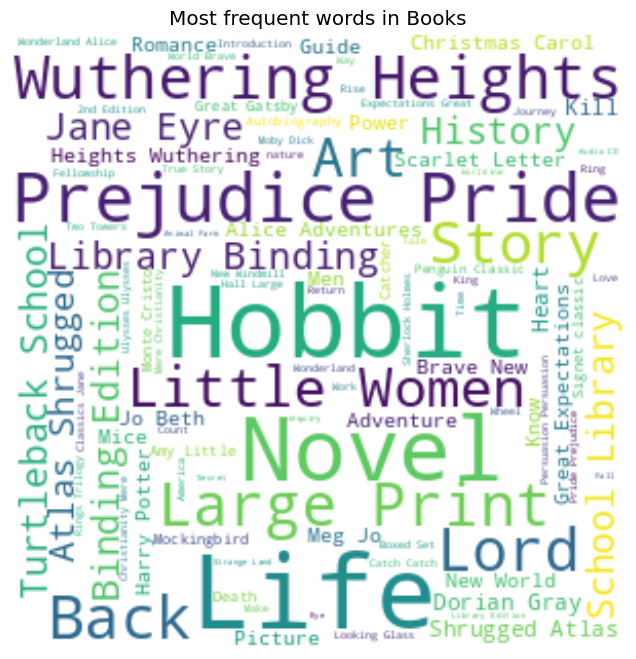

In [16]:
text = " ".join(ratings['Title'])
wordcloud = WordCloud(width=300, height=300, background_color="white", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in Books")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

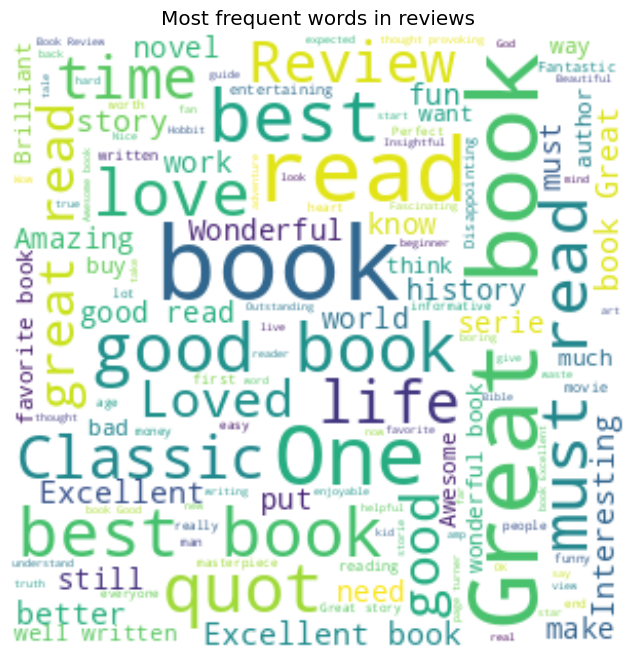

In [17]:
text = " ".join(df['review/summary'].apply(str))
wordcloud = WordCloud(width=300, height=300, background_color="white", max_font_size=50).generate(text)
plt.figure(figsize=(10, 8))
plt.title("Most frequent words in reviews")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## User based collaborative filtering

In [18]:
x = ratings['User_id'].value_counts() > 50
users = x[x].index.tolist()

In [19]:
ratings = ratings[ratings['User_id'].isin(users)]

In [20]:
ratings.shape

(341302, 3)

In [21]:
ratings['Title'].nunique()

76632

In [22]:
ratings.drop_duplicates(inplace=True)

In [23]:
data = pd.pivot_table(data=ratings, index='Title', columns='User_id', values='review/score', fill_value=0)

In [24]:
data.shape

(76632, 2672)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
def suggest_similar_books(book_name, num):
    similar = sorted(list(enumerate(cosine_similarity(data.loc[[book_name], :], data)[0])),key=lambda x:x[1],reverse=True)[1:num+1]
    return [data.iloc[x[0],:].name for x in similar]

In [27]:
suggest_similar_books("The Lord of the Rings Box Set", 10)

['The Lord Of The Rings THREE VOLUME BOXED SET (The Fellowship Of The Ring, The Return of The King, The Two towers)',
 'The Lord of the Rings (3 Volume Set)',
 'The Lord of the Rings - Boxed Set',
 'The Lord of the Rings Trilogy (The Fellowship of the Ring, The Two Towers, The Return of the King, I, II, III)',
 'The Lord of the Rings Trilogy 3 Volumes',
 'The Lord of the Rings Trilogy: Three Volumes in Slipcase',
 'The Hobbit',
 'The Hobbit There and Back Again',
 'The Hobbit or There and Back Again',
 'The Hobbit; Or, There and Back Again']

In [20]:
data.to_csv('final_data.csv')